In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1

In [2]:
# Extract frames from mp4 

import cv2
import math
import os

count = 0
videoFile = "PendulumSwing.mp4"
framePath = "./frames/"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(cv2.CAP_PROP_FPS)
print(frameRate)

while((cap.isOpened())):
    frameId = cap.get(1) #frame num
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = framePath + "frame%d.jpg" % count
        cv2.imwrite(filename, frame)
        print("Frame: %d saved" % count)
        count+=1

cap.release()
print("Done")

29.908238859090943
Frame: 0 saved
Frame: 1 saved
Frame: 2 saved
Frame: 3 saved
Frame: 4 saved
Frame: 5 saved
Frame: 6 saved
Frame: 7 saved
Frame: 8 saved
Frame: 9 saved
Frame: 10 saved
Frame: 11 saved
Frame: 12 saved
Frame: 13 saved
Frame: 14 saved
Frame: 15 saved
Frame: 16 saved
Frame: 17 saved
Frame: 18 saved
Frame: 19 saved
Frame: 20 saved
Frame: 21 saved
Frame: 22 saved
Frame: 23 saved
Frame: 24 saved
Frame: 25 saved
Frame: 26 saved
Frame: 27 saved
Frame: 28 saved
Frame: 29 saved
Frame: 30 saved
Frame: 31 saved
Frame: 32 saved
Frame: 33 saved
Frame: 34 saved
Frame: 35 saved
Frame: 36 saved
Frame: 37 saved
Frame: 38 saved
Frame: 39 saved
Frame: 40 saved
Frame: 41 saved
Frame: 42 saved
Frame: 43 saved
Frame: 44 saved
Frame: 45 saved
Frame: 46 saved
Frame: 47 saved
Frame: 48 saved
Frame: 49 saved
Frame: 50 saved
Frame: 51 saved
Frame: 52 saved
Frame: 53 saved
Frame: 54 saved
Frame: 55 saved
Frame: 56 saved
Frame: 57 saved
Frame: 58 saved
Frame: 59 saved
Frame: 60 saved
Frame: 61 saved

From what I saw of the Pendulum video, it seems the period was about a second (when $\theta = 10$ degrees). In the Spring video it seemed about 1.5 seconds.

## Part 2 (Pendulum)

I don't think the problem wants me to derive anything so I will just say what equations I will be using.

For the Pendulum:
\begin{equation}
    \theta" = -\frac{g}{l}sin(\theta)
\end{equation}
Where $\theta$ is the angle from the vertical to the pendulum, $g$ is the magnitude of the gravitational felid, and $l$ is the length of the string/rod

For the spring:
\begin{equation}
    x" = -\omega^{2}x
\end{equation}
Where $\omega = \sqrt{\frac{k}{m}}$ is the angular frequency, $x$ is the position, $k$ is the spring constant, and $m$ is the mass

I solve the Pendulum's DE numerically using Euler's Method below:

In [3]:
def oil(f0, v0, x0, h, N, f_prime, v_prime):
    f_vals = np.array([])
    f_vals = np.append(f_vals, f0)
    v_vals = np.array([])
    v_vals = np.append(v_vals, v0)
    x_vals = np.arange(x0, x0 + N*h, h)

    for i in range(1, len(x_vals)):
        fi = f_vals[i-1] + h * f_prime(v_vals[i-1])
        vi = v_vals[i-1] + h * v_prime(f_vals[i-1])

        f_vals = np.append(f_vals, fi)
        v_vals = np.append(v_vals, vi)
    return x_vals, f_vals, v_vals

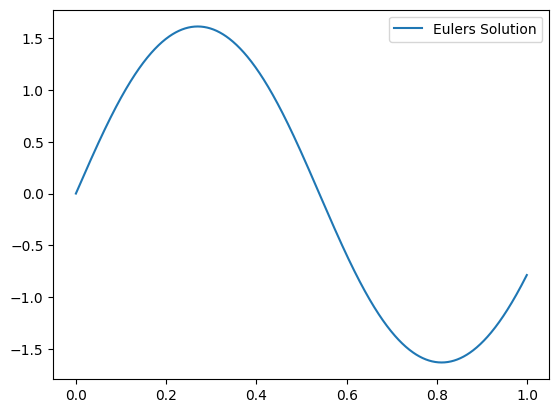

In [4]:
# I will guess that the length of the string is 8 inches (0.2032m) and g = 9.81 m/s^2
g = 9.81
l = 0.2032

f_prime = lambda y: y
v_prime = lambda y: -(g/l)*np.sin(y)

# 10 degrees
x, f, v = oil(0, 10, 0, 0.001, 1000, f_prime, v_prime)

plt.plot(x,f, label = "Eulers Solution")
plt.legend()

To solve by hand:
\begin{equation}
    \theta'' + \frac{g}{l}sin\theta = 0
\end{equation}

set $a = \frac{g}{l}$ for convenience<br>
Now we can rearrange the equation to get:
\begin{equation}
    \theta'' = -a sin\theta
\end{equation}

Use the small angle approximation $sin\theta \approx \theta$ to simplify:
\begin{equation}
    \theta'' = -a \theta
\end{equation}

The general solution to this ODE is: $c_1 cos(x) + c_2 sin(x)$
So:
\begin{equation}
    \theta = c_1 cos(\sqrt a t) + c_2 sin(\sqrt a t)
\end{equation}

Yay we did it
\begin{equation}
    \theta = c_1 cos(\sqrt \frac{g}{l} t) + c_2 sin(\sqrt \frac{g}{l} t)
\end{equation}

If we continue to assume $\theta$ is very small, then the $sin$ term is negligible:
\begin{equation}
    \theta = c_1 cos(\sqrt \frac{g}{l} t)
\end{equation}

In Trig it is known that the period of a $cos$ function is $T = 2\pi \frac{1}{B}$ where: $y = Acos(B(x-C))+D$

In our case $B = \sqrt \frac{g}{l}$. So the period is:
\begin{equation}
    T = 2\pi \sqrt{\frac{l}{q}}
\end{equation}

In [5]:
print(2*np.pi*np.sqrt(l/g))

0.9042889343452957


Seems like the estimates were close

## Part 2 (Spring)

I will now solve the Spring's DE numerically below:

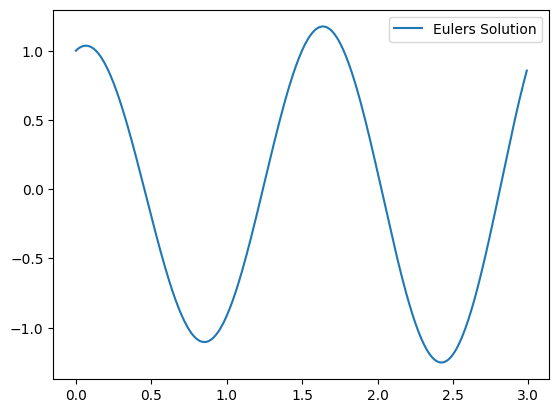

In [6]:
# There is a weight on the spring, I will assume the mass is 40g. I will assume the spring constant is equal to 1

k = 4
m = 1
w = k/m
f_prime = lambda y: y
v_prime = lambda y: -(w**2)*y
x, f, v = oil(1, 1, 0, 0.01, 300, f_prime, v_prime)

plt.plot(x,f, label = "Eulers Solution")
plt.legend()

To solve by hand:
\begin{equation}
    x" = -\omega^{2}x
\end{equation}

The general solution to this ODE is shown below:
\begin{equation}
    x(t) = c_1 cos(\omega t) + c_2 sin(\omega t)
\end{equation}

The period of this function is:
\begin{equation}
    T = \frac{2\pi}{\omega}
\end{equation}

In [7]:
print(2*np.pi/w)

1.5707963267948966


This seems decently close

## Part 3 (Pendulum)

Below we will numerically solve the Damped Pendulum:
\begin{equation}
    \theta" = -\frac{b}{m}\theta' - \frac{g}{l}sin\theta
\end{equation}
Where $b$ is a drag constant

In [8]:
def oil2(theta1_0, theta2_0, lambd, omega, h, N):

    theta1 = theta1_0
    theta2 = theta2_0
    t_values = np.arange(0, N*h, h)
    
    theta1_values = []
    theta2_values = []
    
    for t in t_values:
        theta1_values.append(theta1)
        theta2_values.append(theta2)

        theta1_new = theta1 + h * theta2
        theta2_new = theta2 + h * (-lambd * theta2 - omega**2 * np.sin(theta1))
        
        theta1 = theta1_new
        theta2 = theta2_new
    
    return t_values, theta1_values, theta2_values

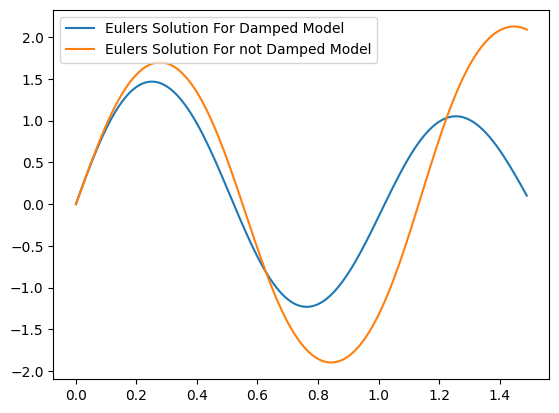

In [9]:
lambd = 1
g = 9.81
l = 0.2032
omega = np.sqrt(g/l)

x, f, v = oil2(0, 10, lambd, omega, 0.01, 150)

plt.plot(x,f, label = "Eulers Solution For Damped Model")

f_prime = lambda y: y
v_prime = lambda y: -(g/l)*np.sin(y)

x, f, v = oil(0, 10, 0, 0.01, 150, f_prime, v_prime)
plt.plot(x,f, label = "Eulers Solution For not Damped Model")

plt.legend()

## Part 3 (Spring)

Below we will numerically solve the Damped Spring:
\begin{equation}
    x" = -\frac{b}{m}x' - \omega^{2}x
\end{equation}

In [10]:
def oil2point5(x10, x20, m, b, k, h, N):
    x1 = x10
    x2 = x20
    
    t_values = np.arange(0, N*h, h)
    
    x1_values = []
    x2_values = []
    
    for t in t_values:
        x1_values.append(x1)
        x2_values.append(x2)
        
        x1_new = x1 + h * x2
        x2_new = x2 + h * (-b/m * x2 - (k/m)**2 * x1)
        
        x1 = x1_new
        x2 = x2_new
    
    return t_values, x1_values, x2_values

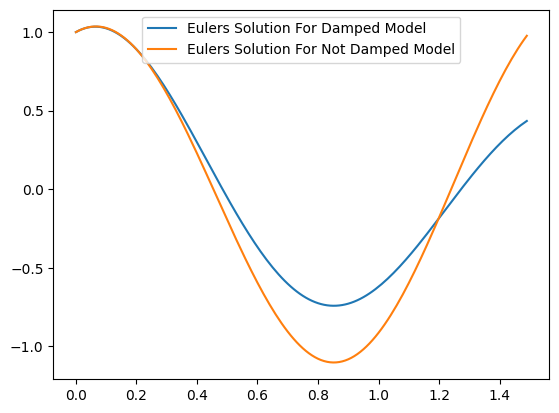

In [11]:
k = 4
m = 1
b = 1

x, f, v = oil2point5(1, 1, m, b, k, 0.01, 150)
plt.plot(x,f, label = "Eulers Solution For Damped Model")

f_prime = lambda y: y
v_prime = lambda y: -(w**2)*y
x, f, v = oil(1, 1, 0, 0.01, 150, f_prime, v_prime)

plt.plot(x,f, label = "Eulers Solution For Not Damped Model")
plt.legend()

It seems the damping is working as expected compared to the not damped plots.